# Importing Libraries

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Importing the Dataset

In [10]:
data_set = pd.read_csv('SupplyChainEmission.csv')
print('shape: ',data_set.shape)
data_set.head()

shape:  (264, 13)


,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,111CA,Farms,carbon dioxide,"kg/2018 USD, purchaser price",Supply Chain Emission Factors without Margins,0.041,0.465,NaN,4,2,1,4,1
1,111CA,Farms,methane,"kg/2018 USD, purchaser price",0.023,0.000,0.023,NaN,3,2,1,1,1
2,111CA,Farms,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,2,1,4,1
3,111CA,Farms,other GHGs,"kg CO2e/2018 USD, purchaser price",0.004,0.000,0.004,NaN,3,2,1,4,1
4,113FF,"Forestry, fishing, and related activities",carbon dioxide,"kg/2018 USD, purchaser price",0.184,0.017,0.201,NaN,4,2,1,4,1


# list of name of all the Columns 

In [11]:
data_set.columns.to_list()

['Industry Code',
 'Industry Name',
 'Substance',
 'Unit',
 'Supply Chain Emission Factors without Margins',
 'Margins of Supply Chain Emission Factors',
 'Supply Chain Emission Factors with Margins',
 'Unnamed: 7',
 'DQ ReliabilityScore of Factors without Margins',
 'DQ TemporalCorrelation of Factors without Margins',
 'DQ GeographicalCorrelation of Factors without Margins',
 'DQ TechnologicalCorrelation of Factors without Margins',
 'DQ DataCollection of Factors without Margins']

# Data type of the columns

In [12]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 13 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Industry Code                                           264 non-null    object 
 1   Industry Name                                           264 non-null    object 
 2   Substance                                               264 non-null    object 
 3   Unit                                                    264 non-null    object 
 4   Supply Chain Emission Factors without Margins           264 non-null    object 
 5   Margins of Supply Chain Emission Factors                264 non-null    float64
 6   Supply Chain Emission Factors with Margins              264 non-null    float64
 7   Unnamed: 7                                              0 non-null      float64
 8   DQ ReliabilityScore of Factors without M

# Cleaning the Data

In [13]:
data_set.dropna(subset=["Supply Chain Emission Factors with Margins"])
data_set.drop_duplicates(inplace=True)
data_set = data_set.drop(columns=['Unnamed: 7'])

In [14]:
data_set.head()

,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,111CA,Farms,carbon dioxide,"kg/2018 USD, purchaser price",Supply Chain Emission Factors without Margins,0.041,0.465,4,2,1,4,1
1,111CA,Farms,methane,"kg/2018 USD, purchaser price",0.023,0.000,0.023,3,2,1,1,1
2,111CA,Farms,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,4,2,1,4,1
3,111CA,Farms,other GHGs,"kg CO2e/2018 USD, purchaser price",0.004,0.000,0.004,3,2,1,4,1
4,113FF,"Forestry, fishing, and related activities",carbon dioxide,"kg/2018 USD, purchaser price",0.184,0.017,0.201,4,2,1,4,1


# Top 10 Industries by Emission

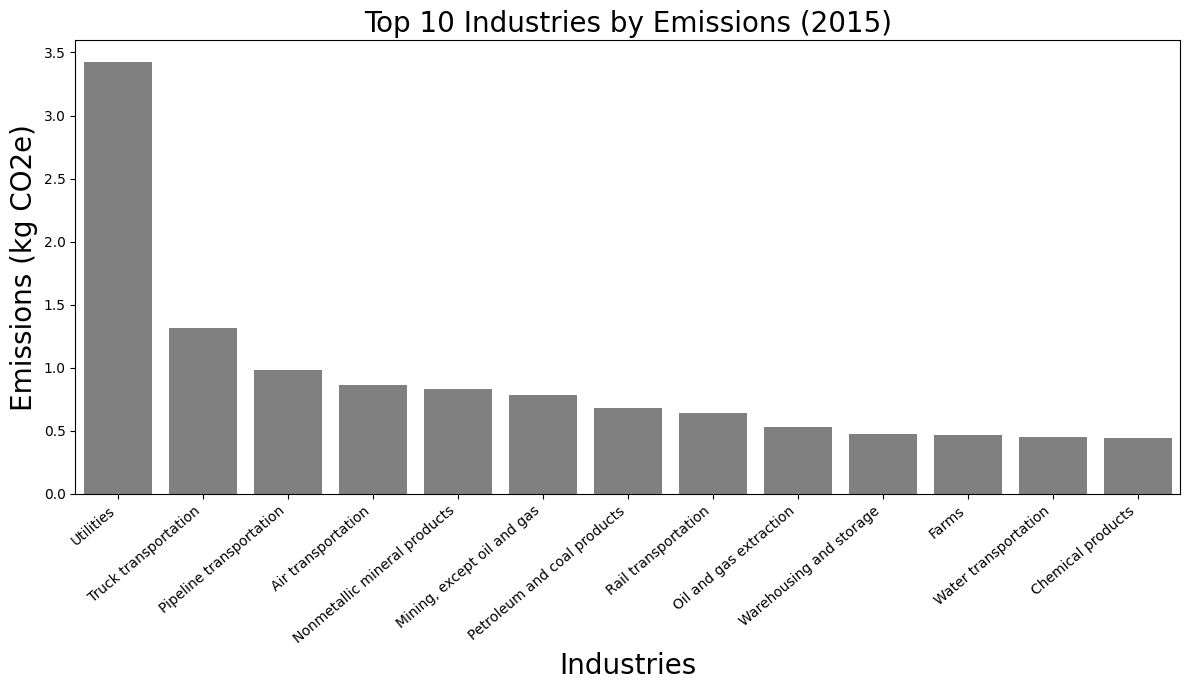

In [15]:

top_10 = data_set.sort_values(by="Supply Chain Emission Factors with Margins", ascending=False).head(13)
plt.figure(figsize=(12,7))
sns.barplot(data=top_10, x='Industry Name', y='Supply Chain Emission Factors with Margins' , color='grey')
plt.title('Top 10 Industries by Emissions (2015)', fontsize=20)
plt.xlabel('Industries',fontsize = 20)
plt.ylabel('Emissions (kg CO2e)',fontsize = 20)
plt.xticks(rotation=40, ha='right')
plt.tight_layout()
plt.show()

# Emission Distribution Across Industries

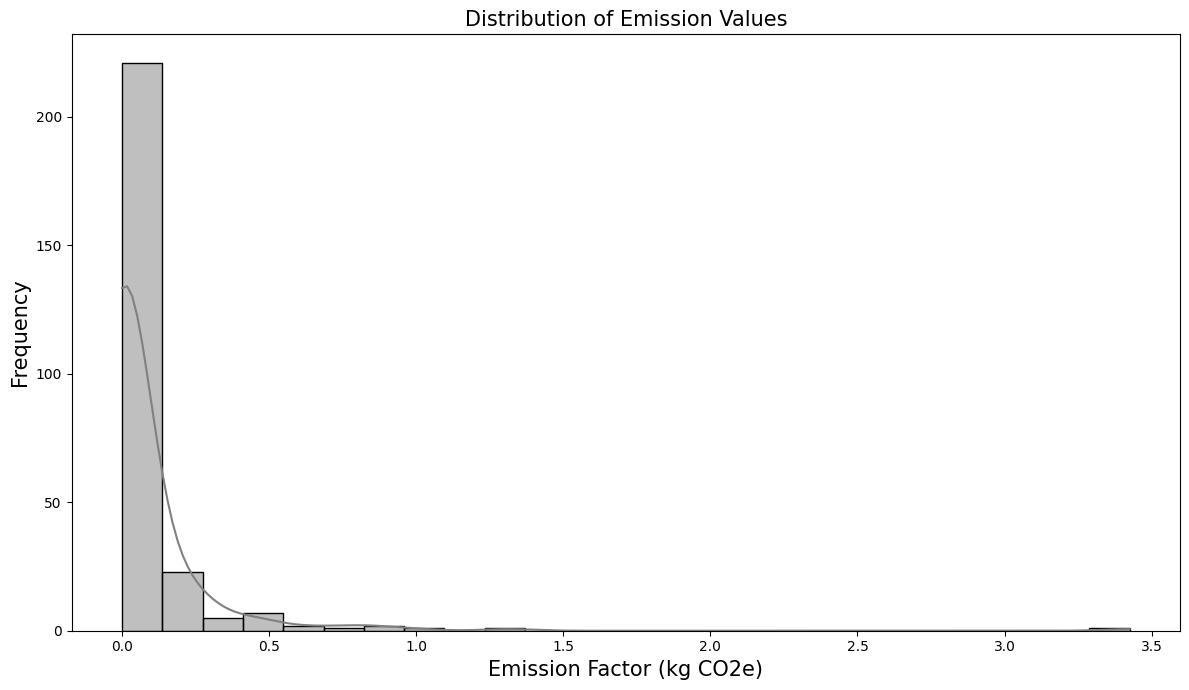

In [16]:
plt.figure(figsize=(12,7))
sns.histplot(data_set["Supply Chain Emission Factors with Margins"], bins=25, kde=True, color='grey')
plt.title("Distribution of Emission Values", fontsize=15)
plt.xlabel("Emission Factor (kg CO2e)",fontsize = 15)
plt.ylabel("Frequency",fontsize = 15)
plt.tight_layout()
plt.show()

# Summary
- **Tools Used**: Python, Pandas, Seaborn, Matplotlib.\n
- **Dataset**: Loaded `SupplyChainEmission.csv` (264 rows, 13 columns) with U.S. industry-wise GHG emission factors (kg/2018 USD).\n
- **Cleaning**: Removed empty `Unnamed: 7` column; invalid entry in emission factors needs further cleaning.\n
- **visualization**:
  - Listed column names and data types to understand dataset structure (e.g., industry codes, substances).\n
  - Histogram of emission factors (with margins) shows [e.g., right-skewed distribution, outliers >5 kg CO2e].\n

- **Outcome**: Dataset explored and  cleaned.